<a href="https://colab.research.google.com/github/han-juyoung/Aimers_Lectures/blob/main/Deep_Learning_%EB%AA%A8%EB%A9%98%ED%85%80(Momentum).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

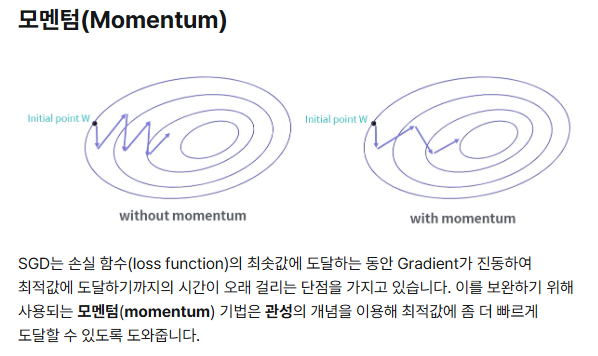

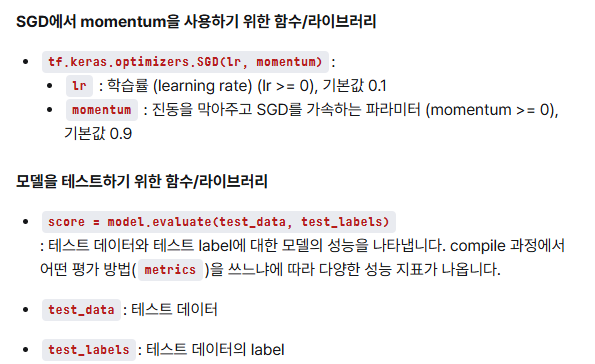

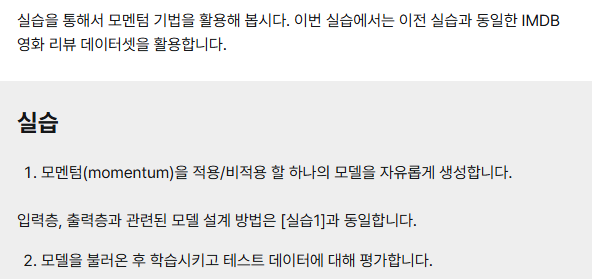

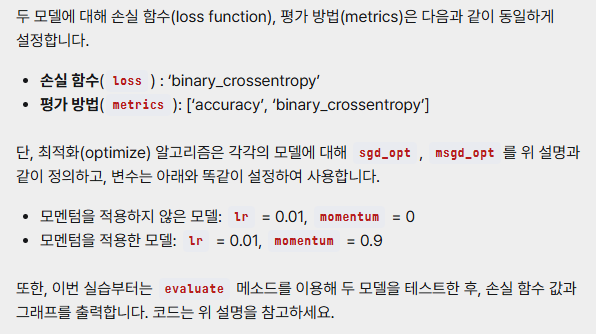

In [ ]:
import numpy as np
import tensorflow as tf
from visual import *

import logging, os
logging.disable(logging.WARNING)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# 데이터를 전처리하는 함수

def sequences_shaping(sequences, dimension):

    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0

    return results

'''
1. 모멘텀(momentum)을 적용/비적용 할 하나의 모델을 자유롭게 생성합니다.
'''

def Momentum_model(word_num):

    model = tf.keras.Sequential([tf.keras.layers.Dense(32, input_shape=(word_num,), activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')])

    return model

'''
2. 두 모델을 불러온 후 학습시키고 테스트 데이터에 대해 평가합니다.

   Step01. Momentum_model 함수를 이용해
           두 모델을 불러옵니다. 모두 동일한 모델입니다.

   Step02. 두 모델의 손실 함수, 최적화 알고리즘,
           평가 방법을 설정합니다.

   Step03. 두 모델의 구조를 확인하는 코드를 작성합니다.

   Step04. 두 모델을 각각 학습시킵니다.
           검증용 데이터도 설정해주세요.
           두 모델 모두 'epochs'는 20, 'batch_size'는
           500으로 설정합니다.

   Step05. 학습된 두 모델을 테스트하고
           binary crossentropy 값을 출력합니다.
           둘 중 어느 모델의 성능이 더 좋은지 확인해보세요.
'''

def main():

    word_num = 100
    data_num = 25000

    # Keras에 내장되어 있는 imdb 데이터 세트를 불러오고 전처리합니다.

    (train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.imdb.load_data(num_words = word_num)

    train_data = sequences_shaping(train_data, dimension = word_num)
    test_data = sequences_shaping(test_data, dimension = word_num)

    sgd_model = Momentum_model(word_num)   # 모멘텀을 사용하지 않을 모델입니다.
    msgd_model = Momentum_model(word_num)  # 모멘텀을 사용할 모델입니다.

    sgd_opt = tf.keras.optimizers.SGD(lr=0.01, momentum=0)
    sgd_model.compile(loss='binary_crossentropy', optimizer=sgd_opt, metrics=['accuracy', 'binary_crossentropy'])

    msgd_opt = tf.keras.optimizers.SGD(lr=0.01, momentum=0.9)
    msgd_model.compile(loss='binary_crossentropy', optimizer=msgd_opt, metrics=['accuracy', 'binary_crossentropy'])

    # 모델 구조 확인
    sgd_model.summary()
    msgd_model.summary()

    sgd_history = sgd_model.fit(train_data, train_labels, epochs=20, batch_size=500, validation_data=(test_data, test_labels), verbose=0)
    print('\n')
    msgd_history = msgd_model.fit(train_data, train_labels, epochs=20, batch_size=500, validation_data=(test_data, test_labels), verbose=0)

    scores_sgd = sgd_model.evaluate(test_data, test_labels, verbose=0)
    scores_msgd = msgd_model.evaluate(test_data, test_labels, verbose=0)

    print('\nscores_sgd: ', scores_sgd[-1])
    print('scores_msgd: ', scores_msgd[-1])

    Visulaize([('SGD', sgd_history),('mSGD', msgd_history)])

    return sgd_history, msgd_history

if __name__ == "__main__":
    main()

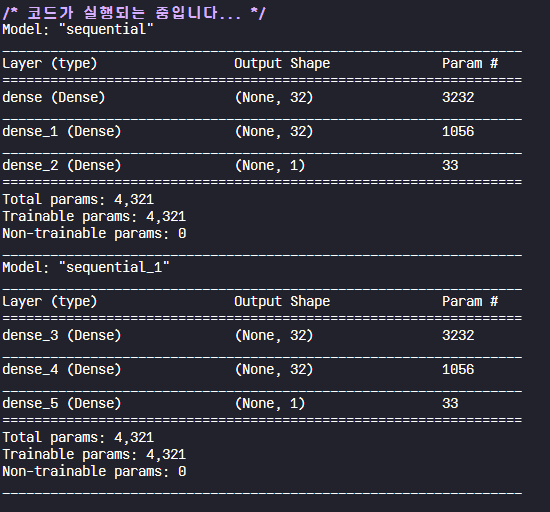

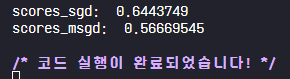

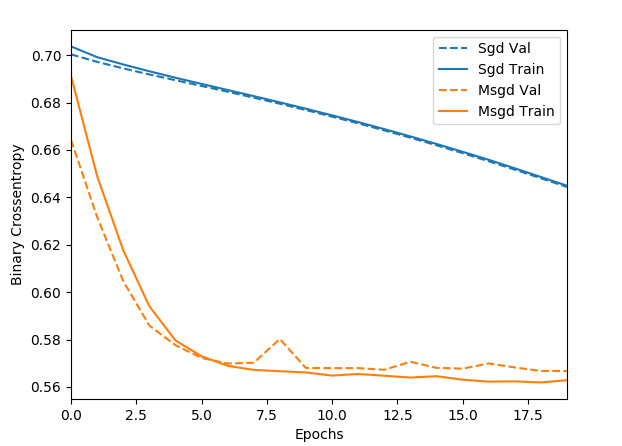